#AG2 - Actividad Guiada 2
Nombre: Hugo Fernandez Amaro<br>
Link:   https://colab.research.google.com/drive/1ERQZszCf6RzwY-tE84Ywnopr5a4uM_n4?usp=sharing <br>
Github: https://github.com/Hfa96/03MIAR_Algoritmos_de_Optimizacion
<br>




In [ ]:
import math
import itertools

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

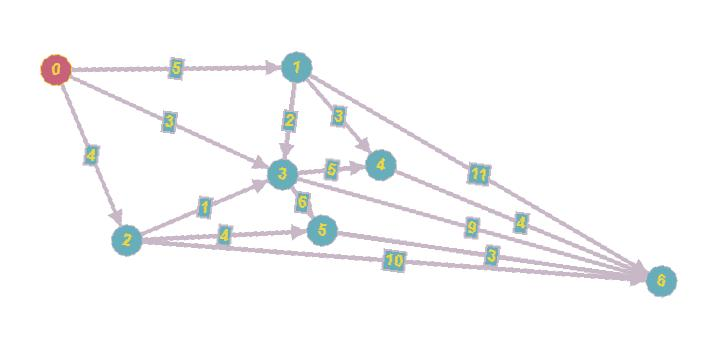

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################  
def Precios(TARIFAS):
################################################################ 
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 3,6) 


La ruta es:


3

##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]
        

In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1, 3, 2)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


#Fuerza Bruta

In [ ]:
def fuerza_bruta(COSTES):

  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor, mejor_solucion = valor_tmp, s

  print("La mejor solucion es: ", mejor_solucion, " con valor ", mejor_valor)

# Análisis para mejorar nota:

#5D

In [ ]:
from random import randint
dimension = 5
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[42, 38, 13, 24, 15], [12, 34, 13, 36, 33], [18, 18, 34, 46, 36], [12, 18, 43, 15, 45], [12, 50, 16, 10, 49]]
La solucion final es: [{'s': (4, 2, 1, 0, 3), 'ci': 68}]  en  41  iteraciones  para dimension:  5
La mejor solucion es:  (3, 2, 1, 4, 0)  con valor  68


# 6D

In [ ]:
from random import randint
dimension = 6
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[17, 30, 36, 30, 48, 32], [33, 24, 29, 14, 35, 27], [49, 48, 45, 22, 16, 22], [32, 40, 49, 50, 16, 11], [19, 36, 20, 37, 37, 21], [10, 21, 40, 31, 33, 24]]
La solucion final es: [{'s': (0, 3, 4, 5, 2, 1), 'ci': 99}]  en  38  iteraciones  para dimension:  6
La mejor solucion es:  (0, 5, 4, 1, 2, 3)  con valor  99


#7D

In [ ]:
from random import randint
dimension = 7
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[18, 24, 23, 39, 49, 40, 41], [31, 47, 29, 24, 13, 14, 34], [25, 28, 42, 29, 31, 24, 36], [15, 44, 30, 19, 37, 42, 20], [15, 24, 19, 18, 22, 15, 13], [44, 27, 15, 25, 49, 31, 29], [19, 50, 10, 47, 40, 25, 40]]
La solucion final es: [{'s': (0, 4, 5, 3, 6, 1, 2), 'ci': 124}]  en  551  iteraciones  para dimension:  7
La mejor solucion es:  (0, 5, 6, 3, 1, 2, 4)  con valor  124


#8D

In [ ]:
from random import randint
dimension = 8
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[39, 19, 23, 42, 30, 31, 28, 26], [29, 11, 47, 16, 23, 16, 17, 30], [33, 45, 34, 10, 18, 24, 26, 10], [32, 30, 19, 44, 12, 19, 21, 50], [43, 32, 47, 29, 30, 20, 49, 40], [18, 19, 41, 27, 22, 15, 39, 49], [46, 36, 14, 44, 16, 17, 36, 25], [17, 47, 20, 26, 44, 47, 16, 20]]
La solucion final es: [{'s': (1, 3, 7, 4, 5, 0, 2, 6), 'ci': 125}]  en  349  iteraciones  para dimension:  8
La mejor solucion es:  (5, 0, 6, 1, 3, 4, 7, 2)  con valor  125


#9D

In [ ]:
from random import randint
dimension = 9
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[31, 26, 34, 18, 41, 45, 38, 34, 41], [31, 15, 44, 41, 48, 42, 11, 29, 13], [20, 33, 16, 23, 47, 41, 20, 18, 12], [41, 39, 27, 17, 18, 22, 36, 24, 36], [40, 42, 11, 27, 16, 20, 38, 49, 41], [44, 34, 40, 16, 32, 35, 41, 17, 14], [30, 45, 12, 11, 11, 41, 25, 13, 20], [17, 21, 38, 23, 30, 44, 31, 21, 30], [14, 19, 47, 43, 35, 19, 50, 21, 27]]
La solucion final es: [{'s': (3, 6, 8, 5, 2, 7, 4, 1, 0), 'ci': 137}]  en  491  iteraciones  para dimension:  9
La mejor solucion es:  (8, 7, 4, 0, 6, 3, 1, 5, 2)  con valor  137


#10D

In [ ]:
from random import randint
dimension = 10
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[38, 15, 30, 18, 19, 20, 34, 35, 35, 39], [24, 12, 22, 33, 15, 33, 47, 16, 40, 17], [11, 40, 35, 14, 39, 38, 17, 40, 16, 40], [13, 23, 48, 46, 16, 30, 49, 10, 24, 30], [42, 49, 43, 24, 14, 25, 35, 25, 12, 21], [23, 27, 22, 19, 36, 32, 10, 29, 10, 11], [26, 34, 12, 43, 15, 27, 34, 32, 31, 15], [31, 10, 19, 48, 46, 10, 28, 29, 30, 45], [36, 27, 43, 43, 14, 43, 41, 47, 17, 36], [27, 27, 41, 33, 17, 17, 31, 30, 48, 25]]
La solucion final es: [{'s': (3, 1, 0, 7, 8, 6, 2, 5, 4, 9), 'ci': 134}]  en  10015  iteraciones  para dimension:  10
La mejor solucion es:  (2, 7, 6, 0, 8, 9, 5, 3, 4, 1)  con valor  131


%timeit ramificacion_y_poda(costes) : 96.8ms +- 18.6ms <br>
%timeit fuerza_bruta(costes): 4.03s +- 390ms

#11D

In [ ]:
from random import randint
dimension = 11
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[13, 44, 11, 22, 20, 10, 22, 24, 10, 17, 44], [43, 34, 10, 30, 15, 30, 43, 49, 16, 19, 47], [22, 49, 18, 11, 44, 39, 28, 26, 20, 28, 20], [10, 16, 49, 43, 36, 38, 24, 23, 41, 37, 32], [13, 33, 37, 35, 23, 19, 14, 35, 12, 25, 19], [50, 10, 50, 21, 49, 32, 49, 20, 21, 37, 26], [30, 49, 21, 30, 17, 21, 17, 38, 38, 16, 15], [13, 45, 41, 28, 38, 41, 48, 24, 38, 34, 31], [29, 29, 37, 27, 25, 13, 16, 18, 20, 34, 17], [31, 41, 43, 11, 11, 15, 25, 43, 16, 22, 46], [26, 34, 50, 50, 24, 14, 40, 46, 48, 38, 35]]
La solucion final es: [{'s': (8, 2, 3, 0, 6, 1, 10, 7, 5, 9, 4), 'ci': 163}]  en  16057  iteraciones  para dimension:  11
La mejor solucion es:  (3, 5, 1, 2, 9, 10, 4, 7, 0, 6, 8)  con valor  147


%timeit ramificacion_y_poda(costes) : 1.79 s ± 164 ms per loop <br>
%timeit fuerza_bruta(costes) : 48.4 s ± 913 ms per loop

a medida que aumentas las dimensiones el algoritmo de fuerza bruta consume mucho más recursos que el algoritmo de Divide y vencerás pero aún así es capaz de realizarlo sin errores en el entorno de colab

#12D ERROR por exceso de RAM

In [ ]:
from random import randint
dimension = 12
costes = [[randint(10,50) for i in range(dimension)] for j in range(dimension)]
print(costes)
ramificacion_y_poda(costes)
fuerza_bruta(costes)

[[36, 31, 36, 17, 33, 36, 38, 22, 34, 42, 18, 23], [16, 31, 28, 48, 42, 15, 46, 27, 45, 45, 17, 19], [45, 29, 15, 23, 50, 29, 50, 27, 19, 27, 15, 20], [48, 42, 46, 30, 14, 41, 12, 39, 16, 21, 48, 47], [33, 45, 30, 35, 11, 50, 31, 45, 40, 18, 39, 23], [38, 46, 42, 25, 35, 23, 47, 44, 50, 26, 13, 30], [41, 15, 39, 28, 10, 14, 34, 22, 20, 19, 23, 36], [37, 46, 25, 15, 34, 39, 18, 13, 43, 12, 15, 17], [12, 42, 38, 45, 20, 17, 36, 18, 28, 39, 23, 20], [15, 31, 13, 14, 31, 19, 40, 14, 21, 41, 37, 40], [14, 26, 14, 46, 47, 47, 21, 39, 13, 49, 17, 23], [39, 31, 25, 49, 45, 22, 41, 11, 27, 33, 29, 34]]


#Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente
 
df([1,2])

[2, 4]

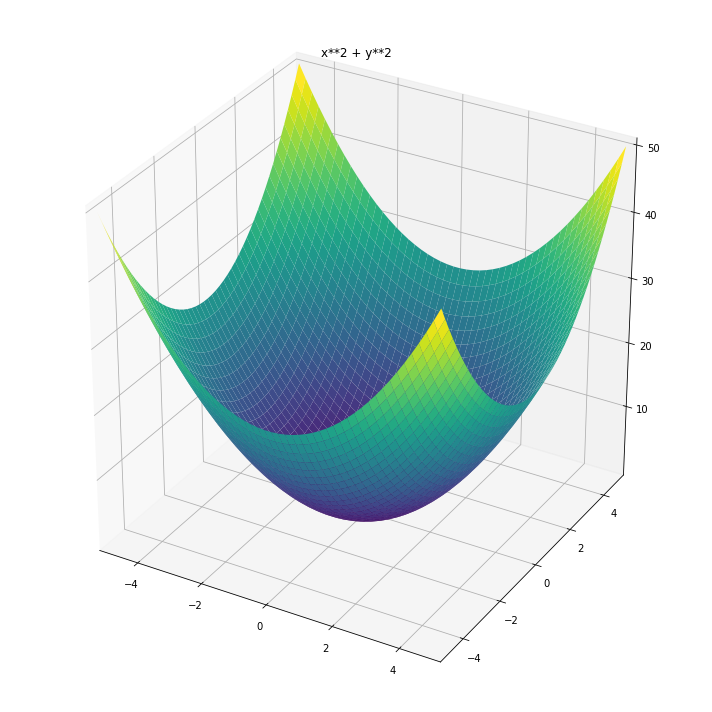

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

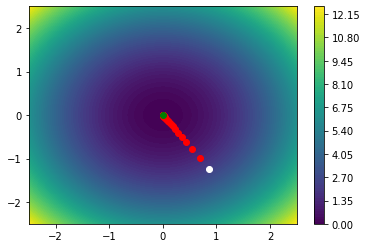

Solucion: [1.2265881165724583e-05, -1.7556301363341928e-05] 4.586755583321587e-10


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
 
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1 

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


# Actividad para mejorar nota

**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
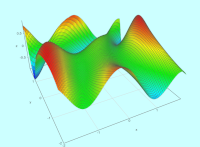


In [ ]:
#Recuperamos una función empleada en la asignatura de Matemáticas
from sympy import *

def grad_f(f):
    vars_ = list((sympify(f).free_symbols))
    str_vars = [str(var) for var in vars_]
    vars_ = sorted(str_vars, key=lambda symbol: symbol)
    return lambdify(vars_, [diff(f, var) for var in vars_], modules="numpy")

In [ ]:
#Definimos la funcion
f2= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
df2 = grad_f("sin(1/2 * x**2 - 1/4 * y**2 + 3)*cos(2*x + 1 - exp(y))")

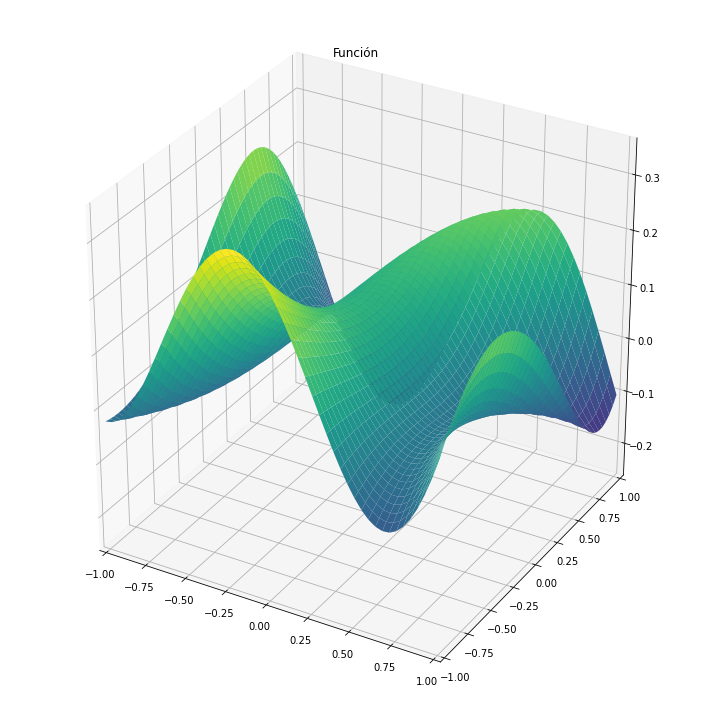

In [ ]:
#Representamos la funcion
x, y = symbols('x y')
plot3d(sin(1/2 * x**2 - 1/4 * y**2 + 3)*cos(2*x + 1 - exp(y)), (x,-1, 1),(y,-1, 1), title="Función", size=(10, 10))

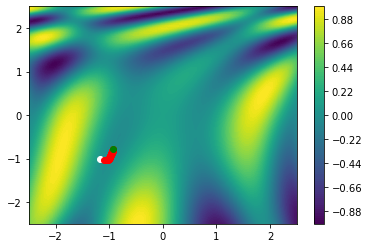

Solucion: [-0.9261142245567661, -0.7872381035391556] -0.03435842241745777


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
 
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f2([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1 

#Iteraciones:500
for _ in range(50):
  grad = df2(P[0],P[1])
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P, f2(P))